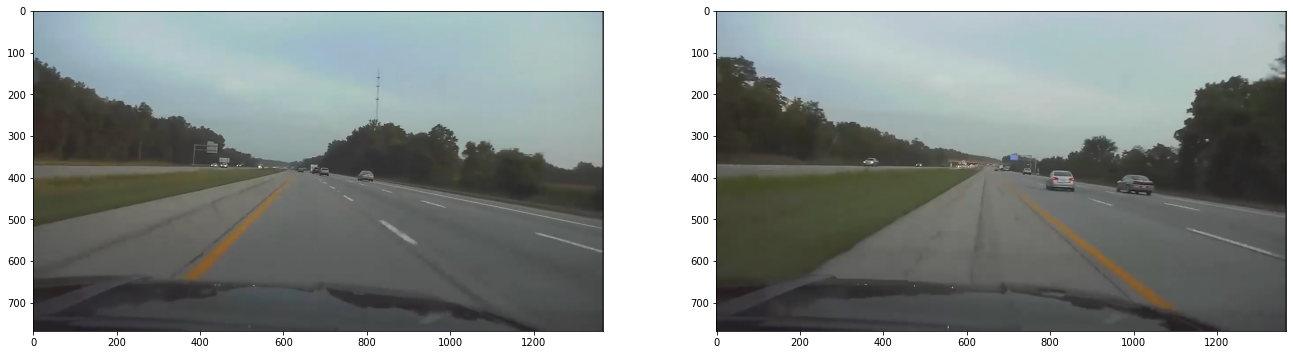

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('7.jpeg')
image2 = cv2.imread('8.jpeg')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplot(1,2,1),plt.imshow(image)
plt.subplot(1,2,2),plt.imshow(image2)
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)


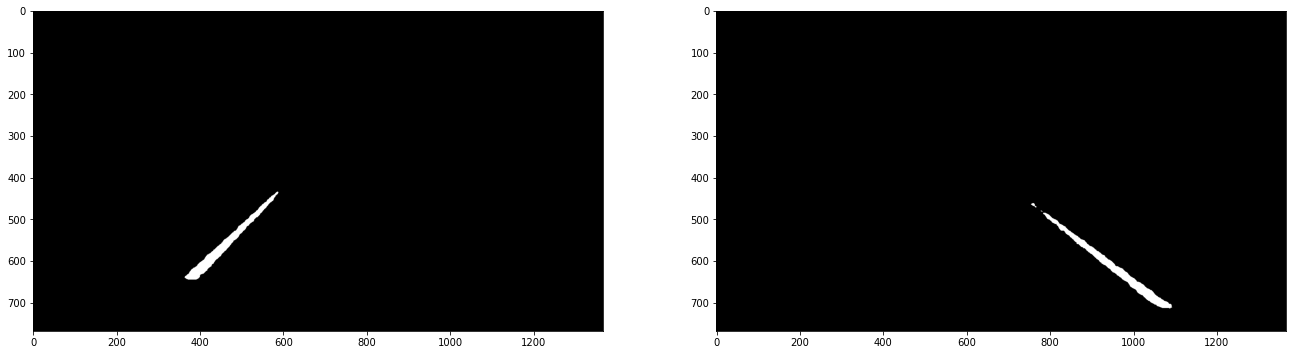

In [2]:
lane_image = np.copy(image)
lane_image2 = np.copy(image2)


image_hsv = cv2.cvtColor(lane_image, cv2.COLOR_RGB2HSV)
image_hsv2 = cv2.cvtColor(lane_image2, cv2.COLOR_RGB2HSV)

#Amarillo
lowerBound= (8,100,100)
upperBound= (34,255,255)

yellow= cv2.inRange(image_hsv, lowerBound, upperBound)
yellow2= cv2.inRange(image_hsv2, lowerBound, upperBound)

plt.figure(2)
plt.subplot(1,2,1),plt.imshow(yellow,'gray')
plt.subplot(1,2,2),plt.imshow(yellow2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

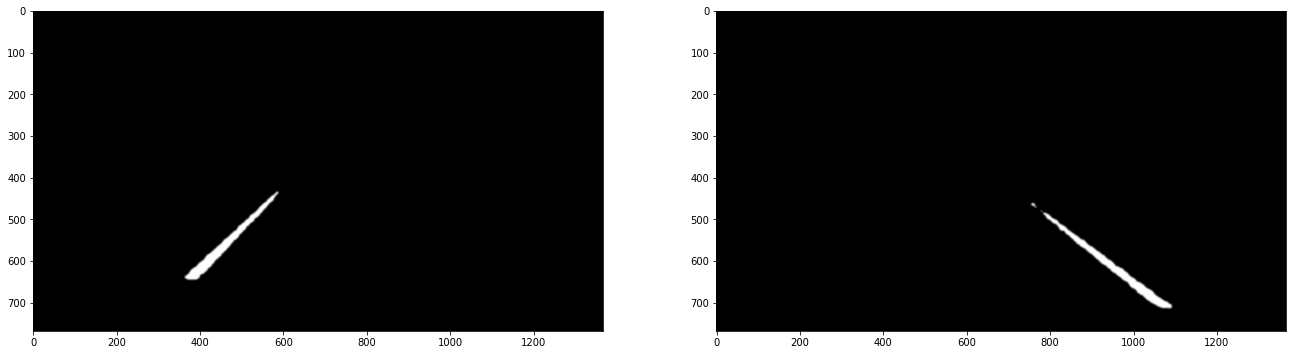

In [3]:
n=9
blur = cv2.GaussianBlur(yellow, (n,n), 0)            
blur2 = cv2.GaussianBlur(yellow2, (n,n), 0)

plt.figure(3)
plt.subplot(1,2,1),plt.imshow(blur,'gray')
plt.subplot(1,2,2),plt.imshow(blur2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

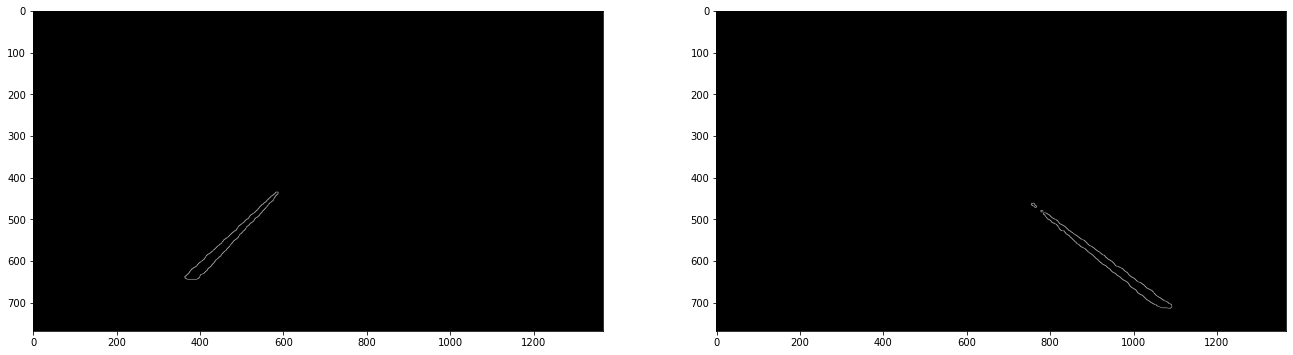

In [4]:
canny = cv2.Canny(blur, 80, 160)
canny2 = cv2.Canny(blur2, 80, 160)

plt.figure(4)
plt.subplot(1,2,1),plt.imshow(canny,'gray')
plt.subplot(1,2,2),plt.imshow(canny2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

768
768


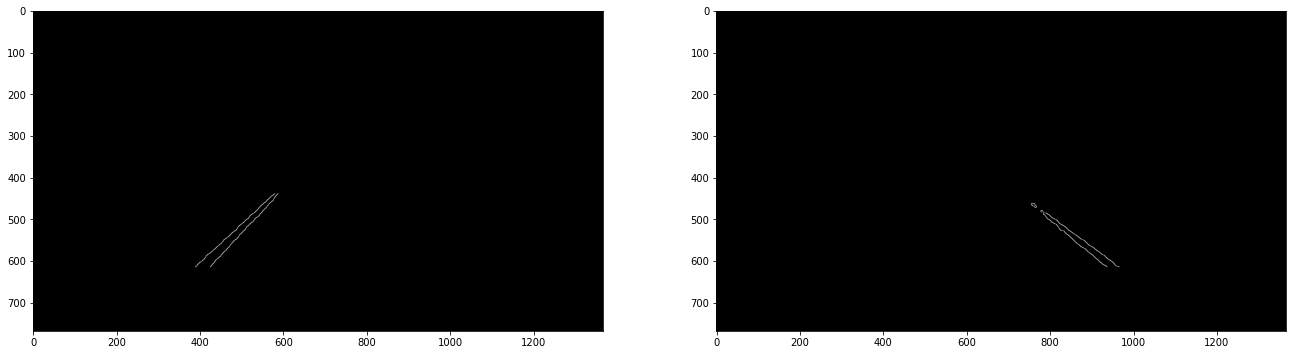

In [5]:
def region_of_interest(image):
    height = image.shape[0]
    length = image.shape[1]
    print(height)
    inf = round((4/7)*height)
    sup = round((4/5)*height)
    polygons = np.array([
        [(0,inf),(length,inf),(length,sup),(0,sup)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

cropped_image = region_of_interest(canny);
cropped_image2 = region_of_interest(canny2);

plt.figure(4)
plt.subplot(1,2,1),plt.imshow(cropped_image,'gray')
plt.subplot(1,2,2),plt.imshow(cropped_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

<class 'numpy.ndarray'>


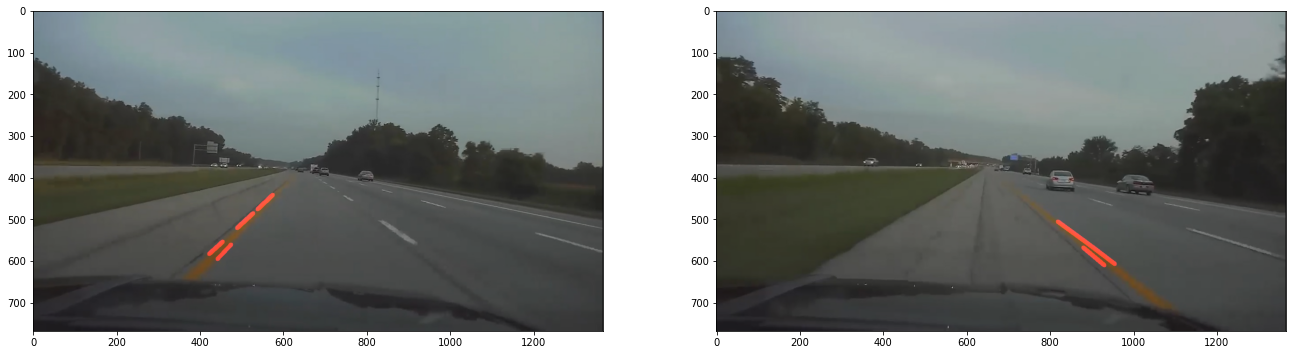

In [6]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    angle = 10
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                cv2.line(line_image, (x1, y1), (x2, y2), (255,0,0), 10)
    return line_image

    
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)
print(type(lines))
lines2 = cv2.HoughLinesP(cropped_image2, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)
line_image = display_lines(lane_image, lines)
line_image2 = display_lines(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

                 line  1
[[442 595 474 561]]
-1.0625
1064
424 614 588 439
                 line  2
[[538 476 574 442]]
-0.9444444444444444
984
392 614 577 439
                 line  3
[[489 521 527 486]]
-0.9210526315789473
971
388 614 578 439
                 line  4
[[422 583 454 554]]
-0.90625
965
387 614 580 439
                 line  1
[[819 506 878 549]]
0.7288135593220338
-90
966 614 726 439
                 line  2
[[880 568 930 610]]
0.84
-171
935 614 726 439
                 line  3
[[877 548 926 585]]
0.7551020408163265
-114
964 614 732 439
                 line  4
[[900 565 955 607]]
0.7636363636363637
-122
964 614 735 439


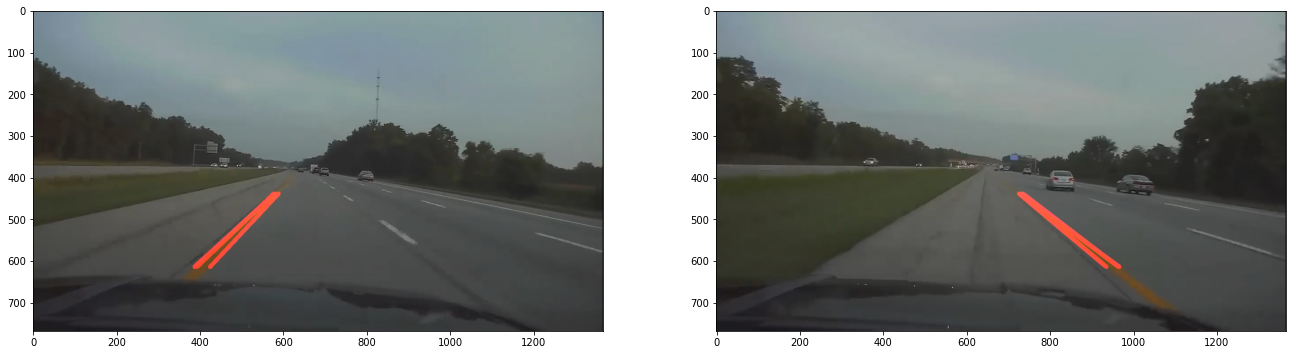

In [7]:
def display_lines_large(image, lines):
    line_image = np.zeros_like(image)
    n = 0
    angle = 10
    height = image.shape[0]
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                n = n+1
                print("                 line ",n)
                print(line)
                slope = ((y2-y1)/(x2-x1))
                print(slope)
                intercept = int(y1-slope*x1)
                print(intercept)
                y1_new = round((4/5)*height)
                y2_new = round((4/7)*height)
                if(slope==0):
                    x1_new = x1
                    x2_new = x2
                else:
                    x1_new = round((y1_new-intercept)/slope)
                    x2_new = round((y2_new-intercept)/slope)
                print(x1_new, y1_new, x2_new, y2_new)    
                cv2.line(line_image, (x1_new, y1_new), (x2_new, y2_new), (255,0,0), 10)
    return line_image

line_image = display_lines_large(lane_image, lines)
line_image2 = display_lines_large(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

length  4
line
(-1.0625, 1064)
new_line
(-1.0625, 1064)
limits
-1.38125 -0.74375 744.8 1383.2
si
line
(-0.9444444444444444, 984)
new_line
(-1.0625, 1064.0)
limits
-1.38125 -0.74375 744.8 1383.2
si
line
(-0.9210526315789473, 971)
new_line
(-1.0034722222222223, 1024.0)
limits
-1.304513888888889 -0.7024305555555557 716.8 1331.2
si
line
(-0.90625, 965)
new_line
(-0.9622624269005848, 997.5)
limits
-1.2509411549707603 -0.6735836988304094 698.25 1296.75
si
new_lines
[(-0.9342562134502924, 981.25)]
______________________________________________________
length  4
line
(0.7288135593220338, -90)
new_line
(0.7288135593220338, -90)
limits
0.5101694915254237 0.947457627118644 -117.0 -63.0
si
line
(0.84, -171)
new_line
(0.7288135593220338, -90.0)
limits
0.5101694915254237 0.947457627118644 -117.0 -63.0
no
line
(0.7551020408163265, -114)
new_line
(0.7288135593220338, -90.0)
limits
0.5101694915254237 0.947457627118644 -117.0 -63.0
si
line
(0.7636363636363637, -122)
new_line
(0.7419578000691802, -102.0)

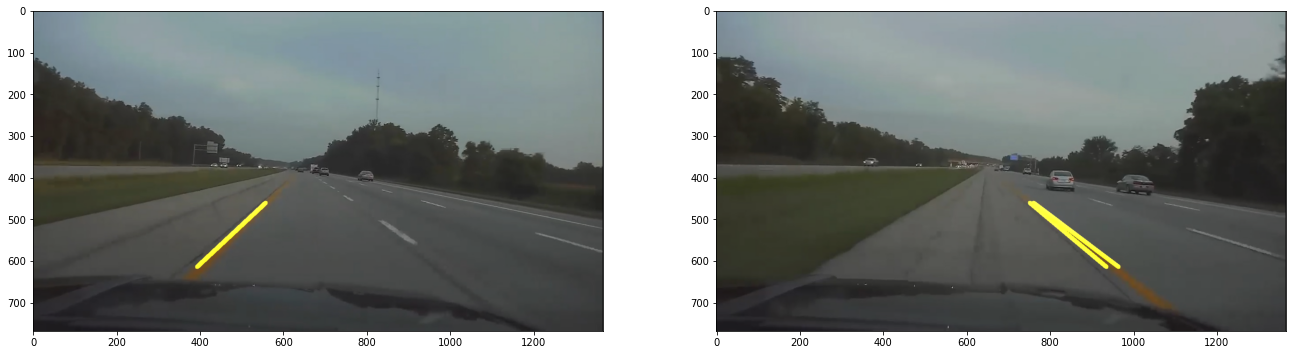

In [8]:
def display_lines_prom(image, lines):
    line_image = np.zeros_like(image)
    n = 0
    angle = 10
    height = image.shape[0]
    param = []
    new_lines = []
    slope_error = 30
    intercept_error = 30
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                slope = ((y2-y1)/(x2-x1))
                intercept = int(y1-slope*x1)
                param.append((slope,intercept))
    print("length ", len(param))
    if len(param) is not 0:
        new_lines.append(param[0])
        for line in param:
            print("line")
            print(line)
            slope = line[0]
            intercept = line[1]
            new_lines2 = new_lines
            i=0
            for new_line in new_lines2:
                print("new_line")
                print(new_line)
                max_slope = new_line[0]+abs(new_line[0])*slope_error/100
                min_slope = new_line[0]-abs(new_line[0])*slope_error/100
                max_intercept = new_line[1]+abs(new_line[1])*intercept_error/100
                min_intercept = new_line[1]-abs(new_line[1])*intercept_error/100
                print("limits")
                print(min_slope, max_slope, min_intercept, max_intercept)
                if ((slope<max_slope)&(slope>min_slope)&(intercept<max_intercept)&(intercept>min_intercept)):
                    print("si")
                    found = True
                    new_slope = (slope+new_line[0])/2
                    new_intercept = (intercept+new_line[1])/2
                    new_line = (new_slope, new_intercept)
                    new_lines[i]=new_line
                    break
                else:
                    print("no")
                    found = False
                i=i+1
            if not found:
                new_lines.append(line)
                
    print("new_lines")
    print(new_lines)
    for line in new_lines:
        slope = line[0]
        intercept = line[1]
        y1_new = round((4/5)*height)
        y2_new = round((3/5)*height) 
        x1_new = round((y1_new-intercept)/slope)
        x2_new = round((y2_new-intercept)/slope)        
        cv2.line(line_image, (x1_new, y1_new), (x2_new, y2_new), (255,255,0), 10)
    return line_image

line_image = display_lines_prom(lane_image, lines)
print("______________________________________________________")
line_image2 = display_lines_prom(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

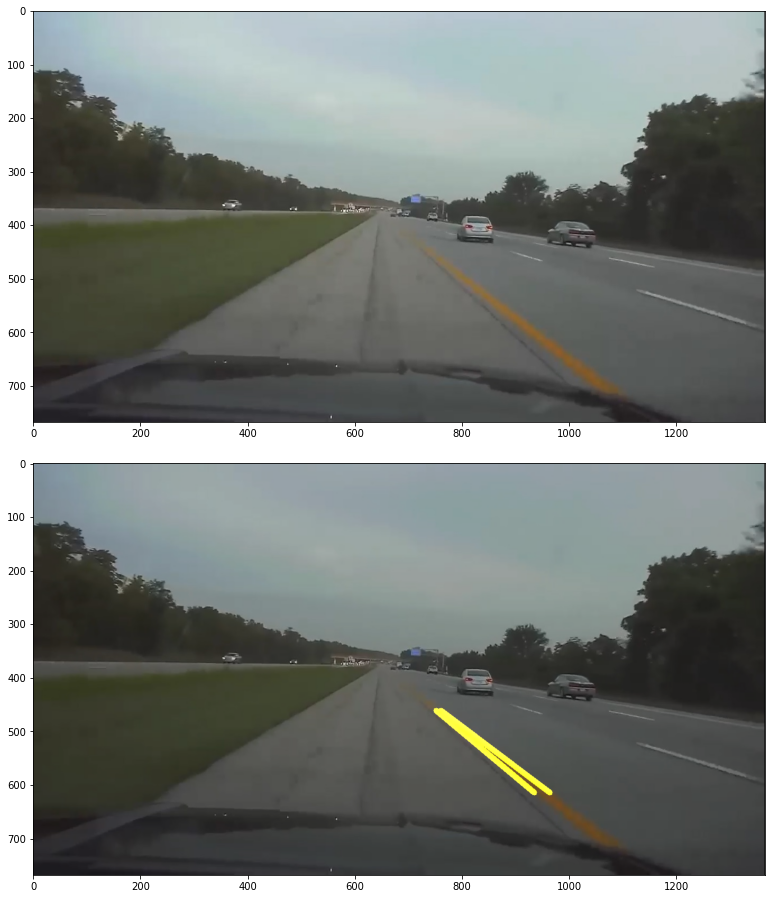

In [9]:
plt.figure(6)
plt.subplot(2,1,1),plt.imshow(image2)
plt.subplot(2,1,2),plt.imshow(mixed_image2)
plt.subplots_adjust(top=4, bottom=1, left=1, right=5, hspace=0.1, wspace=0.2)

Próximo por hacer
* Probar con las imágenes del video
* Intentar hacer el filtro de color como en el de la primera entrega para las líneas amarillas
* Pasarlo a hacer con video